In [1]:
# Do not edit. These are the only imports permitted.
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [2]:
class MAB(ABC):
    """
    Abstract class that represents a multi-armed bandit (MAB)
    """
    
    @abstractmethod
    def play(self, tround, context):
        """
        Play a round
        
        Arguments
        =========
        tround : int
            positive integer identifying the round
        
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to the arms
        
        Returns
        =======
        arm : int
            the positive integer arm id for this round
        """
    
    @abstractmethod
    def update(self, arm, reward, context):
        """
        Updates the internal state of the MAB after a play
        
        Arguments
        =========
        arm : int
            a positive integer arm id in {1, ..., self.narms}
        
        reward : float
            reward received from arm
        
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to arms
        """

In [3]:
def index_max(input_list):
    """
    return the index of the max element in the list.
    NOTICE: Tie-breaking uniformly among value-maximising arms.
    arm 0 是第一个arm
    """
    m = max(input_list)
    index_list = [i for i, j in enumerate(input_list) if j == m]
    if len(index_list) == 1:
        return index_list[0]
    else:
        return np.random.choice(index_list)

In [4]:
class EpsGreedy(MAB):
    """
    Epsilon-Greedy multi-armed bandit

    Arguments
    =========
    narms : int
        number of arms

    epsilon : float
        explore probability

    Q0 : float, optional
        initial value for the arms
    """
    
    def __init__(self, narms, epsilon, Q0=np.inf):
        self.narms=narms
        self.epsilon=epsilon
        # 记录每一个arm的pull的次数和得到的reward
        self.counts = [0 for col in range(self.narms)]
        self.avg_rewards = [Q0 for col in range(self.narms)]
        
    def play(self, tround, context=None):
        """
        Play a round
        
        Arguments
        =========
        tround : int
            positive integer identifying the round
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to the arms
        
        Returns
        =======
        arm : int
            the positive integer arm id for this round
        """
        # exploit
        if np.random.random() > self.epsilon:
            return index_max(self.avg_rewards)
        else:
        # explore
            return np.random.randint(self.narms)
        
    def update(self, arm, reward, context=None):
        """
        Updates the internal state of the MAB after a play
        
        Arguments
        =========
        arm : int
            a positive integer arm id in {1, ..., self.narms}
        
        reward : float
            reward received from arm
        
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to arms
        """
        self.counts[arm] = self.counts[arm] + 1
        n = self.counts[arm]
        old_avg_reward = self.avg_rewards[arm]
        if self.avg_rewards[arm] == np.inf:
            new_avg_reward = reward
        else:
            new_avg_reward = (old_avg_reward * (n-1) + reward)/n
        self.avg_rewards[arm] = new_avg_reward

In [7]:
def offlineEvaluate(mab, arms, rewards, contexts, nrounds=None):
    """
    Offline evaluation of a multi-armed bandit
    
    Arguments
    =========
    mab : instance of MAB
    
    arms : 1D int array, shape (nevents,) 
        integer arm id for each event
    
    rewards : 1D float array, shape (nevents,)
        reward received for each event
    
    contexts : 2D float array, shape (nevents, mab.narms*nfeatures)
        contexts presented to the arms (stacked horizontally) 
        for each event.
        
    nrounds : int, optional
        number of matching events to evaluate `mab` on.
    
    Returns
    =======
    out : 1D float array
        rewards for the matching events
    """
    rewards_for_matched_round = []
    tround = 1
    length = len(rewards)
    context_round
    for context_round in range(length):

        context = contexts[context_round]
        response_arm = arms[context_round]-1
        response_reward = rewards[context_round]
        estimate_arm = mab.play(tround, context)
        if estimate_arm == response_arm:
            tround += 1
            rewards_for_matched_round.append(response_reward)
            # update
            mab.update(response_arm, response_reward, context)
        if tround > nrounds:
            break
    return rewards_for_matched_round

In [62]:

x=lambda delta:(1  + np.sqrt(np.log(2/delta)/2))
x(1)

1.5887050112577374

1.5887050112577374
2.949474603520405


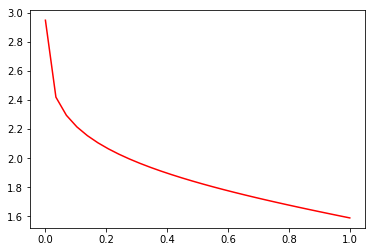

In [69]:

fig = plt.figure()
ax = plt.axes()
delta = np.linspace(0.001, 1, 30)
ax.plot(delta,list(map(alpha,delta)), 'r')
print(min(list(map(lambda delta:(1  + np.sqrt(np.log(2/delta)/2)), delta))))
print(max(list(map(lambda delta:(1  + np.sqrt(np.log(2/delta)/2)), delta))))
# A reasonable range of alpha will be 1.6 to 3

In [5]:
# load the data
dataset = np.loadtxt('dataset.txt', dtype=int)
arms = dataset[:,0]
contexts = dataset[:,1]
contexts = dataset[:,2:102]

In [21]:
contexts

array([[ 5,  0,  0, ..., 30,  4,  0],
       [ 1,  3, 36, ...,  0,  0, 10],
       [ 3,  0,  0, ...,  3,  0,  0],
       ...,
       [79,  0,  0, ...,  0,  0,  0],
       [29,  0,  2, ..., 17,  0,  0],
       [ 0,  2, 35, ...,  0,  0, 12]])

In [20]:
contexts

array([[ 5,  0,  0, ..., 30,  4,  0],
       [ 1,  3, 36, ...,  0,  0, 10],
       [ 3,  0,  0, ...,  3,  0,  0],
       ...,
       [79,  0,  0, ...,  0,  0,  0],
       [29,  0,  2, ..., 17,  0,  0],
       [ 0,  2, 35, ...,  0,  0, 12]])

In [31]:
[np.inf for col in range(4)]

[inf, inf, inf, inf]

In [15]:
# todo contexts中的arm是从1开始的。
mab = EpsGreedy(10, 0.05)
results_EpsGreedy = offlineEvaluate(mab, arms, rewards, contexts, 800)
print('EpsGreedy average reward', np.mean(results_EpsGreedy))

EpsGreedy average reward 0.1
